# Elbow criterion

In [1]:
import numpy as np
from numpy.random import RandomState
import matplotlib.pyplot as plt

In [ ]:
rnd = RandomState(25)
x1 = sorted(list(rnd.normal(1.0, 0.5, size=100)))
y1 = list(rnd.normal(2.0, 0.4, size=100))
x2 = sorted(list(rnd.normal(2.0, 0.3, size=100)))
y2 = list(rnd.normal(4.0, 0.4, size=100))
x3 = sorted(list(rnd.normal(2.5, 0.4, size=100)))
y3 = list(rnd.normal(2.0, 0.5, size=100))

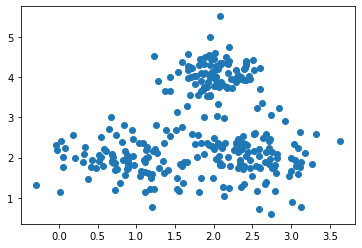

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x1+x2+x3, y1+y2+y3)
plt.show()

In [ ]:
models = []
# First situation - 1 cluster:
first_model = [(x1+x2+x3, y1+y2+y3)]

# Second situation - 2 clusters:
second_model = [(x1+x3, y1+y3), (x2,y2)]

# Third situation - 3 clusters:
third_model = [(x1, y1), (x2, y2), (x3, y3)]

# Fourth situation - 4 clusters:
fourth_model = [(x1[:int(len(x1)/2)], y1[:int(len(y1)/2)]), 
                (x1[int(len(x1)/2):], y1[int(len(y1)/2):]),
                (x2, y2), (x3, y3)]

# Fifth situation - 5 clusters:
fifth_model = [(x1[:int(len(x1)/2)], y1[:int(len(y1)/2)]), 
               (x1[int(len(x1)/2):], y1[int(len(y1)/2):]),
               (x2[:int(len(x2)/2)], y2[:int(len(y2)/2)]), 
               (x2[int(len(x2)/2):], y2[int(len(y2)/2):]),
               (x3, y3)]

# Sixth situation - 6 clusters:
sixth_model = [(x1[:int(len(x1)/2)], y1[:int(len(y1)/2)]), 
               (x1[int(len(x1)/2):], y1[int(len(y1)/2):]),
               (x2[:int(len(x2)/2)], y2[:int(len(y2)/2)]), 
               (x2[int(len(x2)/2):], y2[int(len(y2)/2):]),
               (x3[:int(len(x3)/2)], y3[:int(len(y3)/2)]), 
               (x3[int(len(x3)/2):], y3[int(len(y3)/2):])]
models = [first_model, second_model, third_model, 
          fourth_model, fifth_model, sixth_model]

In [ ]:
def show_clusters(clusters):
  fig, ax = plt.subplots()
  print(len(clusters))
  for x,y in clusters:
    ax.scatter(x, y)
  plt.show()

6


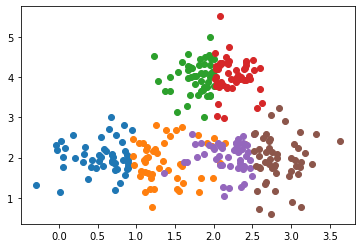

In [ ]:
show_clusters(sixth_model)

In [ ]:
def sse(clusters):
    result = 0
    for xs, ys in clusters:
        distance = calculate_distance(xs, ys)
        result += distance / len(xs)
    return result
        
def calculate_distance(xs, ys):
    result = 0
    for x1, y1 in zip(xs, ys):
        for x2, y2 in zip(xs, ys):
            result += np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    return result

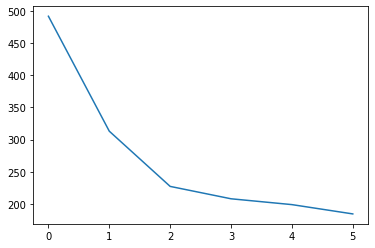

In [ ]:
distances = []
for model in models:
  distances.append(sse(model))


plt.plot(list(range(len(distances))), distances)
plt.show()

# Silhouette

In [ ]:
def dist_to_cluster(point, cluster):
    x_i, y_i = point
    xs, ys = cluster
    distances = 0
    for x_j, y_j in zip(xs, ys):
        distances += np.sqrt((x_j - x_i)**2 + (y_j - y_i)**2)
    return distances

def a(point, cluster):
    distances = dist_to_cluster(point, cluster)
    return 1 / (len(cluster[0]) - 1) * distances

def b(point, other_clusters):
    x_i, y_i = point
    result = [1 / len(cluster[0]) * dist_to_cluster(point, cluster) 
              for cluster 
              in other_clusters]
    return min(result)

def silhouette(point, cluster, other_clusters):
    if len(cluster) == 1:
        return 0
    else:
        ar = a(point, cluster)
        br = b(point, other_clusters)
        return (br - ar) / max(ar, br)

def global_silhouette(clusters):
  if len(clusters) == 1:
    return 0
  results = []
  for key, cluster in clusters.items():
      other_clusters = [c for k, c in clusters.items() if k != key]
      for point in zip(*cluster):
          s = silhouette(point, cluster, other_clusters)
          results.append(s)
  return np.mean(results)

sil = []
for model in models:
  to_dict = {}
  for index, cluster in enumerate(model):
    to_dict[index] = cluster
  
  returned = global_silhouette(to_dict)
  sil.append(returned)

plt.plot(list(range(1, len(sil)+1)), sil)
plt.show()

NameError: ignored

# K-means

First, let's get a small dataset of points with two attributes, x and y

In [ ]:
!git clone https://github.com/matzim95/ML-datasets

%matplotlib inline
import pandas as pd

points = pd.read_csv('ML-datasets/points.csv', header = None)

points.head()

Cloning into 'ML-datasets'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (59/59), done.
remote: Total 71 (delta 16), reused 59 (delta 12), pack-reused 0
Unpacking objects: 100% (71/71), done.


,0,1
0,0.065446,-0.768664
1,-1.529015,-0.429531
2,1.709934,0.698853
3,1.167791,1.012626
4,-1.801101,-0.318613


Let's check how many clusters we should divide this set into, let's use matplotlib

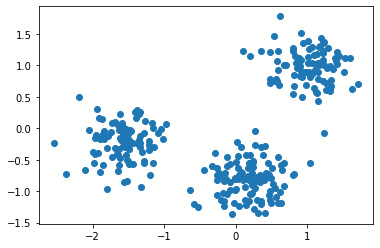

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
xs = points.loc[:,0]
ys = points.loc[:,1]
ax.scatter(xs, ys)
plt.show()

We can see that we should therefore divide the set into three clusters. So let's do it!

In [ ]:
# Import KMeans
from sklearn.cluster import KMeans

# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

labels = model.predict(points)

now let's see how it looks

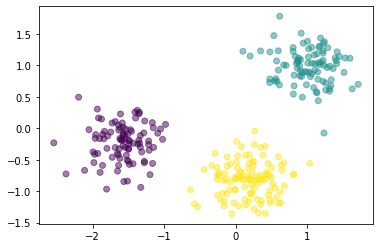

In [ ]:
plt.scatter(xs, ys, c=labels, alpha=0.5)
plt.show()

We can also predict labels for new points based on clusters already created. Let us now look for the centroids of the clusters

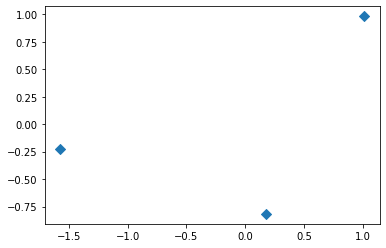

In [ ]:
# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

fig, ax = plt.subplots()

# Make a scatter plot of centroids_x and centroids_y
ax.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

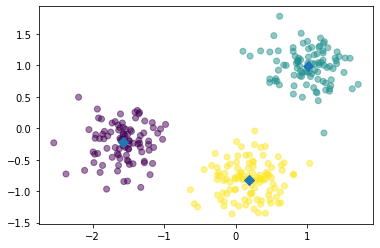

In [ ]:
fig, ax = plt.subplots()
ax.scatter(xs, ys, c=labels, alpha=0.5)
ax.scatter(centroids_x, centroids_y, marker='D', s=50)
plt.show()

And how to judge how many clusters there should be if you can't see it at first glance? If we have data with labels, we can easily judge it using classification measures. If not, however, we must use a different measure. The most important thing for us is that the distances of the points from the centers of the clusters are as small as possible (the clusters are consolidated). That's what the built-in inertias measure is for. It shows us the sum of the distances of all points from their centroids.

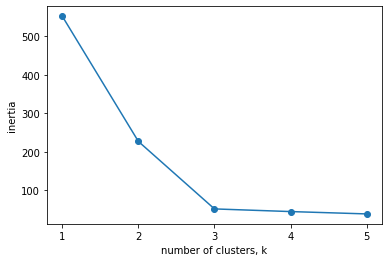

In [ ]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(points)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
fig, ax = plt.subplots()
ax.plot(ks, inertias, '-o')
ax.set_xlabel('number of clusters, k')
ax.set_ylabel('inertia')
ax.set_xticks(ks)
plt.show()


As you can see, the measure is already quite small for 3 clusters. Of course, it continues to get smaller, but we don't want there to be too many clusters. We have a golden mean here.

When we are dealing with a labeled set, we can use traditional quality measures

In [ ]:
def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ML-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

iris, iris_classes = load_dataset('iris', 'species')

y = iris.pop('class')
X = iris

In [ ]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties   0   1   2
labels               
0          50   0   0
1           0  48  14
2           0   2  36


Now a more difficult set

In [ ]:
wine, wine_classes = load_dataset('wine', 'Class')

y = wine.pop('class')
X = wine
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties   0   1   2
labels               
0          46   0   1
1          13  29  20
2           0  19  50


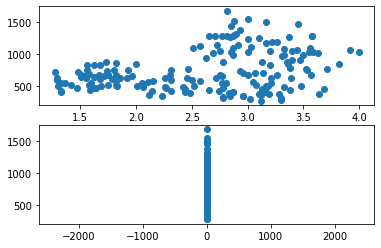

In [ ]:
fig, axs = plt.subplots(2, 1)
axs[0].scatter(X['OD280/OD315 of diluted wines'], X['Proline'])
axs[1].axis("equal")
axs[1].scatter(X['OD280/OD315 of diluted wines'], X['Proline'])
plt.show()

In [ ]:
for column in X:
    print(X[column].var())

0.6590623278105763
1.2480154034152227
0.07526463530756043
11.152686155018094
203.9893353646925
0.3916895353266042
0.9977186726337837
0.015488633911001082
0.3275946676823461
5.374449383491404
0.05224496070589728
0.5040864089379803
99166.71735542428


To fix this, standardization must be performed. For this we have a ready library

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create scaler: scaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

labels = model.fit_predict(X_scaled)

In [ ]:
# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties   0   1   2
labels               
0           0  48   3
1          59   0   3
2           0   0  65


You can also make a ready pipeline (path so that preprocessing and clustering occur automatically one after another)

In [ ]:
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(scaler, model)
pipeline.fit(X)
labels = pipeline.predict(X)

Experiment with multiple scaling methods can dramatically increase your score also on classification tasks, even when your hyperparameters are tuned. So, you should consider the scaling method as an important hyperparameter of your model.
Scaling methods affect differently on different classifiers. Distance-based classifiers like SVM, KNN, and MLP(neural network) dramatically benefit from scaling. But even trees (CART, RF), that are agnostic to some of the scaling methods, can benefit from other methods.

In [ ]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()
pipeline = make_pipeline(normalizer, model)
pipeline.fit(X)
labels = pipeline.predict(X)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': y})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)

varieties   0   1   2
labels               
0          51   4   5
1           0   4  33
2           8  40  33


# Hierarchical clustering

Now let's move on to hierarchical clustering. For this purpose, we will use the Eurovision 2016 collection.

In [ ]:
eurovision = pd.read_csv('ML-datasets/eurovision-2016.csv')
eurovision = eurovision.pivot(index='From country', columns='To country')['Jury Rank']
eurovision = eurovision.fillna(0)
eurovision.index

Index(['Albania', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belarus',
       'Belgium', 'Bosnia & Herzegovina', 'Bulgaria', 'Croatia', 'Cyprus',
       'Czech Republic', 'Denmark', 'Estonia', 'F.Y.R. Macedonia', 'Finland',
       'France', 'Georgia', 'Germany', 'Greece', 'Hungary', 'Iceland',
       'Ireland', 'Israel', 'Italy', 'Latvia', 'Lithuania', 'Malta', 'Moldova',
       'Montenegro', 'Norway', 'Poland', 'Russia', 'San Marino', 'Serbia',
       'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'The Netherlands',
       'Ukraine', 'United Kingdom'],
      dtype='object', name='From country')

In the scikit library, the linkage method is responsible for hierarchical clustering, while the dendrogram method allows you to visualize the result of its work. Linkage 'complete' means that the distance between the clusters will be measured as the distance between the most distant samples in both clusters

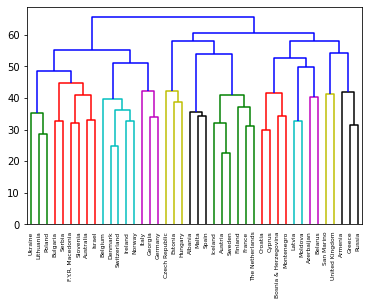

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(eurovision, method='complete')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=eurovision.index,
           leaf_rotation=90,
           leaf_font_size=6,
            )
plt.show()

The height of the dendrogram allows you to determine the degree of approximation of individual points (the lower the connection is made, the closer the elements are to each other). You can also do the 'single' type, then the distance between the clusters is measured by the distance of the closest points of both clusters

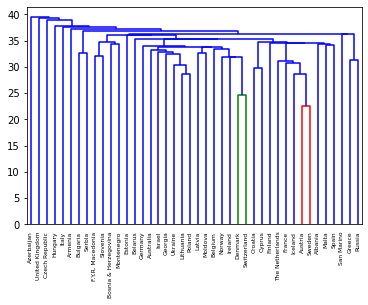

In [ ]:
mergings = linkage(eurovision, method='single')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=eurovision.index,
           leaf_rotation=90,
           leaf_font_size=6,
            )
plt.show()

As you can see, everything is on a much lower level. Here, too, we can play with sample normalization

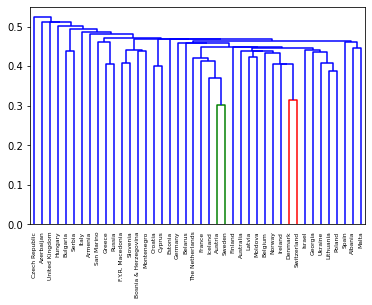

In [ ]:
from sklearn.preprocessing import normalize
normalized_eurovision = normalize(eurovision)
mergings = linkage(normalized_eurovision, method='single')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=eurovision.index,
           leaf_rotation=90,
           leaf_font_size=6,
            )
plt.show()

We can see the cluster labels at a certain height using the fcluster function

In [ ]:
from scipy.cluster.hierarchy import fcluster

labels = fcluster(mergings, 60, criterion='distance')
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]


Another method for data visualization and clustering - tSNE - t-distibuted stochastic neighbor embedding. maps data to 2 or 3 dimensional space. Great method for exploring the collections. TSNE has learning rate. It gives a different graph with each run.

If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers. If the cost function gets stuck in a bad local minimum increasing the learning rate may help.

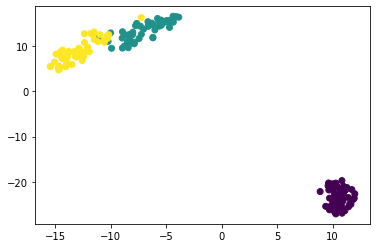

In [ ]:
from sklearn.manifold import TSNE

iris, iris_classes = load_dataset('iris', 'species')

y = iris.pop('class')
X = iris

# Create a TSNE instance: model
model = TSNE(learning_rate=300)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c=y)
plt.show()

# Dimensionality reduction

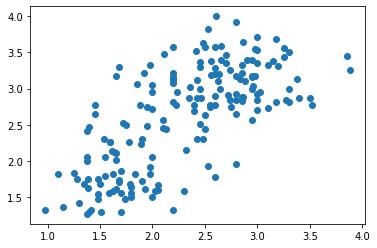

0.6999493647911863


In [ ]:
from scipy.stats import pearsonr

wine, wine_classes = load_dataset('wine', 'Class')

y = wine.pop('class')
X = wine

xs = wine['Total phenols']
ys = wine['OD280/OD315 of diluted wines']

fig, ax = plt.subplots()
ax.scatter(xs, ys)
plt.show()

correlation, pvalue = pearsonr(xs, ys)
print(correlation)

Now we will make a decorerarisation

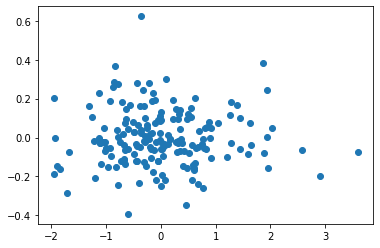

-7.3075226425523e-17


In [ ]:
from sklearn.decomposition import PCA
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(wine)

# Assign 5th column of pca_features: xs
xs = pca_features[:,5]

# Assign 11th column of pca_features: ys
ys = pca_features[:,11]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.show()


# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

After decorerarisation, we can start reducing dimensions (the lossy method). We need to find out how many minimum parameters a dataset needs to be correctly recognized. The PCA algorithm looks for features that have high variance. The PCA library will also help us in this.

Text(0, 0.5, 'variance')

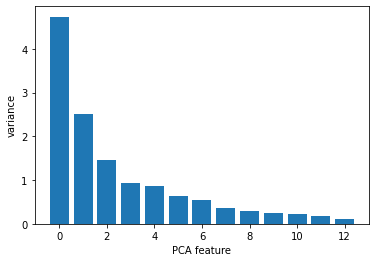

In [ ]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(wine)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')

Let's finally move on to the reduction of dimensions. For this purpose, when defining the PCA model, we must define the number of components we want to include.

In [ ]:
scaler = StandardScaler()
scaler.fit(wine)
scaled_wine = scaler.transform(wine)

pca = PCA(n_components=3)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_wine)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_wine)

# Print the shape of pca_features
print(pca_features.shape)

(178, 3)


Now we can see our 3 dimensions on the chart

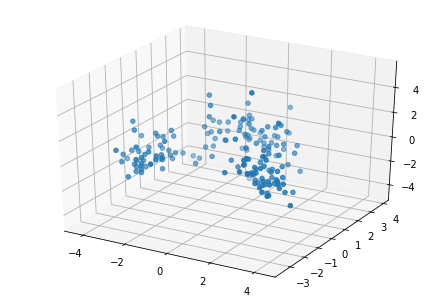

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(pca_features[:,0], pca_features[:,1], pca_features[:,2])
plt.show()

In general, dimension reduction works for long sets, such as a set of words found in different texts.